### K Nearest Neighbours

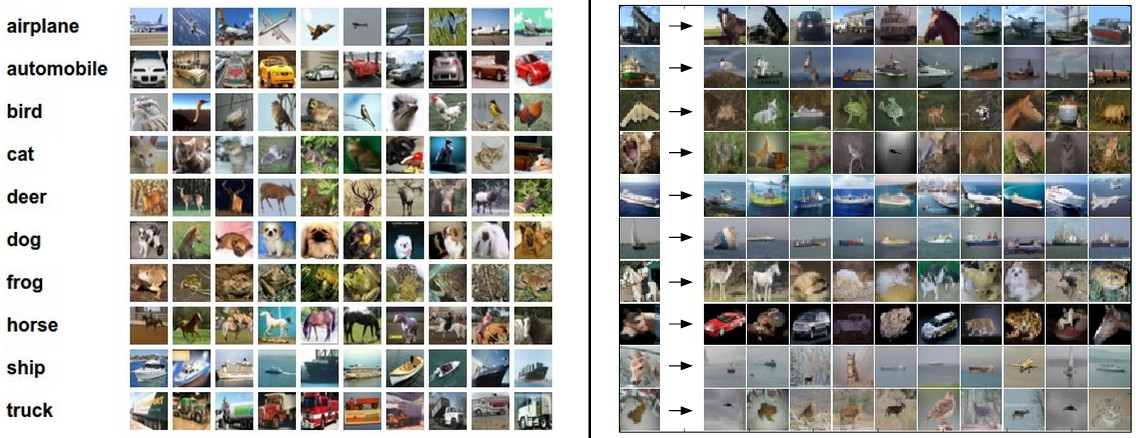

### Напоминание по работе с Python

#### Функции

Определение функции не выводит ничего, просто Python "запоминает", как её считать

In [63]:
def function(x, y, z):
    # какой-то код функции
    return x + y + z

Вызов функции с аргументами возвращает ответ, мы можем сохранить его куда-нибудь, или вывести в ячейке

In [107]:
import numpy as np
from collections import Counter

In [108]:
func_value = function(1, 2 ,3)

In [111]:
function(1, 2, 3)

6

In [112]:
func_value

6

#### Классы

Объекты, которые хранят в себе функции(__методы__) и какие-то данные(__поля__ или __аттрибуты__)

При описании методов класса, в каждый метод должен передаваться аргумент "self" - текущий объект класса.

In [113]:
class MyClass:
    # __init__ - это конструктор, в котором мы указываем, какие данные хранятся в классе. 
    # Запускается при создании объекта.
    def __init__(self):
        self.attribute_1 = 2
        self.attribute_2 = 5
        self.attribute_3 = np.array([2, 4, 2])
        
        
    # просто метод, который возвращает аттрибут по его номеру
    # чтобы получить аттрибут, сохранённый в классе, нужно вызвать его как self.имя_аттрибута (напр. self.attribute_1)
    def get_attribute(self, n):
        if n == 1:
            return self.attribute_1
        elif n == 2:
            return self.attribute_2
        elif n == 3:
            return self.attribute_3

Определение класса также ничего не выводит, Python просто "запоминает" его структуру, поля и методы.

In [114]:
my_class = MyClass() # Запускается конструктор, создаётся объект класса

In [115]:
my_class.get_attribute(2) # Из объекта запускается метод класса и возвращает что-то

5

## Сделаем свой kNN!

In [136]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.power(x-y, 2)))

def manhattan_distance(x, y):
    return np.absolute((x-y).sum())

In [137]:
a, b = np.array([1, 3, 2 ,4]), np.array([5, 4, 2 ,4])
print("Евклидово расстояние")
print("Ваш ответ: {}\nПравильный ответ: {}\n".format(euclidean_distance(a, b), 4.12310562561))

print("Манхеттенское расстояние")
print("Ваш ответ: {}\nПравильный ответ: {}".format(manhattan_distance(a, b), 5))
      
    

Евклидово расстояние
Ваш ответ: 4.123105625617661
Правильный ответ: 4.12310562561

Манхеттенское расстояние
Ваш ответ: 5
Правильный ответ: 5


In [229]:
class kNNClassifier:
    def __init__(self, k = 5, metric=None):
        self.metric = metric
        self.X = None
        self.Y = None
        self.k = k
    
    def fit(self, X, Y):
        # Просто сохранить выборку и ответы
        self.X_train = X
        self.Y_train = Y
        
        # Ваш код
        
        return self
    
    def find_dists_(self, X):
        # Найти расстояния между каждым объектом X и каждым объектом обучающей выборки X_train
        # по заданной метрике metric
        
        # Результат - матрица dists размера (len(X), len(X_train))
        dists = np.zeros((len(X), len(self.X_train)))
        
        for i in range(len(X)):
            for j in range (len(X_train)):
                dists[i][j] = self.metric(X[i], self.X_train[j])
            
        return dists
    
    def find_labels_(self, dists, k):
        Y = np.zeros(len(dists))
        # По расстояниям до каждого объекта обучающей выборки, найти соответствующие классы.
        # Для каждой строчки в dists:
        # 1. Найти индексы k ближайших объектов (соседей)
        
        # 2. Найти метки этих соседей
        
        # 3. Найти, какая метка среди соседей встречается чаще всего
        # 4. Сохранить эту метку как ответ на текущем объекте
        for i in range (len(dists)):
            knn_index=np.argsort(dists[i])[:k]
            knn_labels = self.Y_train[knn_index]
            label = np.argmax(np.bincount(knn_labels))
            Y[i]=label
           
        # Ваш код
        
        return Y
    
    def predict(self, X):
        # Получить предсказания для матрицы объектов X
        return self.find_labels_(self.find_dists_(X), self.k)

### В следующих двух ячейках происходит проверка ваших функций, чтобы вы могли последовательно реализовывать и проверять их

#### fit и find_dists

In [230]:
X_train = np.array([[1, 2, 3, 2], [1, 2, 2, 1], [2, 3, 4, 1], [1, 1, 1, 1], [0, 0.5, 0.1, 1]])
Y_train = np.array([1, 2, 2, 1, 3])
X = np.array([[1, 5, 5, 1], [0, 78, 2, 1]])
knn = kNNClassifier(metric=euclidean_distance).fit(X_train, Y_train)
dists = knn.find_dists_(X)
print("Ваша матрица дистанций:\n")
print(dists)
print()
print("Настоящая матрица дистанций:\n")
print(np.array([[ 3.74165739,  4.24264069,  2.44948974,  5.65685425,  6.72755528],
       [76.01973428, 76.00657866, 75.05331438, 77.01298592, 77.52328682]]))

Ваша матрица дистанций:

[[ 3.74165739  4.24264069  2.44948974  5.65685425  6.72755528]
 [76.01973428 76.00657866 75.05331438 77.01298592 77.52328682]]

Настоящая матрица дистанций:

[[ 3.74165739  4.24264069  2.44948974  5.65685425  6.72755528]
 [76.01973428 76.00657866 75.05331438 77.01298592 77.52328682]]


#### find_labels_

In [231]:
print("Ваши предсказанные метки:")
print(knn.find_labels_(dists, 3))
print()
print("Должны быть такие метки:")
print([2, 2])

Ваши предсказанные метки:
[2. 2.]

Должны быть такие метки:
[2, 2]


In [216]:
dists

array([[ 3.74165739,  4.24264069,  2.44948974,  5.65685425,  6.72755528],
       [76.01973428, 76.00657866, 75.05331438, 77.01298592, 77.52328682]])

### Считаем данные

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

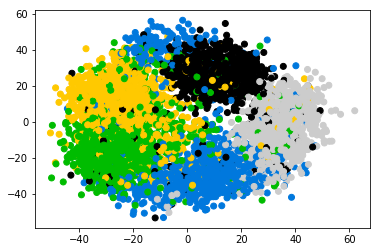

In [233]:
data = np.load('data.npz')
X, Y = data["X"], data["y"]

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='nipy_spectral')

### Разобъём их на train и test, test_size=0.25, random_state=153

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=153)

### Создайте и обучите объект вашего класса kNNClassifier на обучающей выборке с k=3

In [235]:
knn = kNNClassifier(k=3, metric=euclidean_distance)
knn.fit(X_train, Y_train)

In [236]:
%%time

predict = knn.predict(X_test)

Wall time: 48.1 s


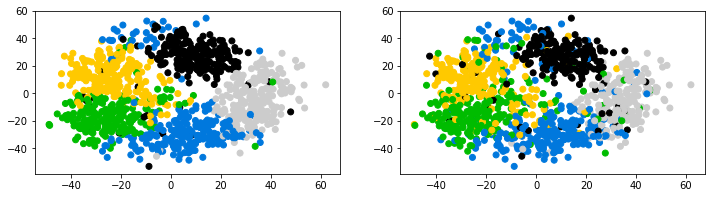

In [237]:
predict = knn.predict(X_test)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predict, cmap='nipy_spectral')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='nipy_spectral')

### Посчитайте Accuracy и ROC AUC для вашей модели

In [238]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
print(np.mean(predict == Y_test))

0.7630878438331854


### Обучите KNeighboursClassifier из sklearn с k = 3

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [253]:
knn_skl = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [252]:
%%time
predict_skl = knn_skl.predict(X_test)

Wall time: 99.7 ms


### Сравните время работы нашей модели и модели из sklearn

### Обратим внимание на гиперпараметры модели (metric, k)

#### Попробуйте подобрать такое k, и такую метрику чтобы accuracy на тесте была больше 0.8. Посчитайте также ROC AUC.

In [280]:
# Можно перебирать, можно тыкать набум
knn_skl = KNeighborsClassifier(n_neighbors=10, metric=euclidean_distance).fit(X_train, Y_train)
predict_skl = knn_skl.predict(X_test)
print(np.mean(predict_skl == Y_test))
# Ваш код

0.8110026619343389


### А теперь разобъём выборку по-другому (random_state = 1024)

In [277]:
X_train_new, X_test_new, Y_train_new, Y_test_new =train_test_split(X, Y, test_size = 0.25, random_state=1024)

### Обучите модель из sklearn с найденным выше "хорошими" гиперпараметрами


In [296]:
knn_skl = KNeighborsClassifier(n_neighbors=17, metric=).fit(X_train_new, Y_train_new)

#### Посмотрите на Accuracy и ROC AUC на новом тесте

In [299]:
predict_skl = knn_skl.predict(X_test_new)
print(np.mean(predict_skl == Y_test_new))

0.8145519077196096


In [298]:
from sklearn.model_selection import GridSearchCV

In [286]:
knn = KNeighborsClassifier()

In [287]:
params = {'n_neighbors': np.arange(1, 20)}

In [288]:
gs = GridSearchCV(knn, params)

In [291]:
gs.fit(X, Y)

C:\Users\Marina bar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [294]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')